In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\almal\Desktop\cleaned_dataset_A.csv")

In [5]:
df

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
1,Manchester United,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,0.000000,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
2,Manchester United,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,0.000000,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
3,Leicester City,Goalkeeper,191.000000,25.0,65,0.000000,0.000000,0.015340,0.0,0.000000,1.257883,0.291461,5867,0,0,0,2000000,2000000,1,0
4,Leicester City,Goalkeeper,189.000000,33.0,31,0.000000,0.000000,0.064516,0.0,0.000000,1.483871,0.161290,2790,89,14,0,600000,3500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
5731,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
5732,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
5733,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [7]:
# Drop the 'position_encoded' column because there is another column with the same meaning
df.drop(['position_encoded'], axis=1, inplace=True)

In [9]:
categorical_features = ['team','position']
numeric_features = ['height' 'age',	'appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets','minutes played','days_injured','games_injured',
                    'award','current_value','highest_value','position_encoded',	'winger']

In [11]:
#we should delet anything with number 1
for i in categorical_features:
    print (df[i].value_counts())

team
Al-Batin FC             35
Swallows FC             35
Maritzburg United FC    35
Incheon United          34
FC Seoul                34
                        ..
Crystal Palace           2
Villarreal CF            2
Inter Milan              2
FC Barcelona             2
Leicester City           2
Name: count, Length: 356, dtype: int64
position
Defender Centre-Back          1061
Goalkeeper                     788
midfield-CentralMidfield       603
midfield-DefensiveMidfield     539
Defender Right-Back            524
Defender Left-Back             498
Attack Centre-Forward          456
midfield-AttackingMidfield     351
Attack-RightWinger             346
Attack-LeftWinger              299
midfield-RightMidfield          61
midfield-LeftMidfield           58
midfield                        57
Attack                          38
Defender                        30
Attack-SecondStriker            26
Name: count, dtype: int64


In [13]:
team_counts = df['team'].value_counts()

df = df[df['team'].isin(team_counts[team_counts >= 2].index)]

In [15]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [17]:
df.shape

(5735, 389)

In [19]:
categorical_features

['team', 'position']

In [21]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.842171
appearance             0.380520
minutes played         0.376898
assists                0.209244
                         ...   
position_Defender     -0.056639
position_Attack       -0.065048
position_midfield     -0.079197
goals conceded        -0.101227
position_Goalkeeper   -0.143065
Name: current_value, Length: 389, dtype: float64


In [23]:
threshold = 0.1 

selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'goals', 'assists', 'goals conceded', 'minutes played',
       'days_injured', 'games_injured', 'award', 'current_value',
       'highest_value', 'position_Goalkeeper'],
      dtype='object')

In [27]:
selected_features = ['appearance', 'goals', 'assists', 'goals conceded', 'minutes played',
       'days_injured', 'games_injured', 'award', 'current_value',
       'highest_value', 'position_Goalkeeper']

In [29]:
df = df[selected_features]
df.head()

,appearance,goals,assists,goals conceded,minutes played,days_injured,games_injured,award,current_value,highest_value,position_Goalkeeper
0,34,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,False
1,39,0.129125,0.064562,0.000000,2788,0,0,1,800000,800000,False
2,51,0.153759,0.102506,0.000000,3512,0,0,1,800000,800000,False
3,65,0.000000,0.000000,1.257883,5867,0,0,0,2000000,2000000,True
4,31,0.000000,0.000000,1.483871,2790,89,14,0,600000,3500000,True


In [31]:
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
model = LinearRegression()

In [35]:
ridge_model = Ridge()  

In [37]:
lasso_model = Lasso()

In [39]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5,10]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

In [41]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [43]:
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [45]:
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [47]:
grid_search_ridge.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 3e-07, 0.0002, 0.001, 0.01, 0.5, 1, 5,
                                   10]},
             scoring='neg_mean_squared_error', verbose=1)

In [49]:
grid_search_lasso.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 3e-07, 0.0002, 0.001, 0.01, 0.5, 1, 5,
                                   10]},
             scoring='neg_mean_squared_error', verbose=1)

In [51]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

In [53]:
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [55]:
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [57]:
# Best hyperparameter
print("Best parameters found: ", grid_search_ridge.best_params_)

# Best model
best_ridge = grid_search_ridge.best_estimator_

Best parameters found:  {'alpha': 5}


In [59]:
# Best hyperparameter
print("Best parameters found: ", grid_search_lasso.best_params_)

# Best model
best_lasso = grid_search_lasso.best_estimator_

Best parameters found:  {'alpha': 10}


In [61]:
y_pred_ridge_cv = best_ridge.predict(X_test_scaled)

In [63]:
y_pred_lasso_cv = best_lasso.predict(X_test_scaled)

In [65]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-150464.037602
goals,7793.175197
assists,21103.088760
goals conceded,-24037.474206
minutes played,236762.580448
days_injured,14099.760615
games_injured,-77269.036767
award,-49728.386549
highest_value,887839.280408
position_Goalkeeper,-17161.024338


In [67]:
print(model.intercept_) 

890677.8552746294


In [69]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-150433.684457
goals,7789.964048
assists,21100.316221
goals conceded,-24036.535642
minutes played,236734.755954
days_injured,14086.729092
games_injured,-77255.536775
award,-49727.176399
highest_value,887837.403390
position_Goalkeeper,-17159.154310


In [71]:
coeff_df = pd.DataFrame(best_lasso.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-150160.255228
goals,7761.044103
assists,21075.349985
goals conceded,-24028.090714
minutes played,236484.109653
days_injured,13969.446982
games_injured,-77134.036900
award,-49716.285427
highest_value,887820.504458
position_Goalkeeper,-17142.304051


In [73]:
coeff_df = pd.DataFrame(ridge_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-149298.410970
goals,7698.490667
assists,21038.817035
goals conceded,-24015.395664
minutes played,235725.643309
days_injured,13968.083229
games_injured,-77074.792179
award,-49680.493083
highest_value,887579.257200
position_Goalkeeper,-17116.788789


In [75]:
coeff_df = pd.DataFrame(best_ridge.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-144761.512655
goals,7331.007368
assists,20790.525421
goals conceded,-23928.566841
minutes played,231695.196503
days_injured,13449.706820
games_injured,-76307.649269
award,-49489.374560
highest_value,886541.859200
position_Goalkeeper,-16946.833469


In [77]:
y_base = [y_train.mean()] * len(y_test)

In [79]:
#Mean Square Error
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 1050112394948.8411


In [81]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 308885174091.7094
Mean Squared Error for testing: 294694941581.8621


In [83]:
#Mean_absolute_error
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 752491.718664132


In [85]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 326788.83052242466
Mean Absolute Error for testing: 320320.11040559097


In [87]:
#Root Mean Squared Error
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 867.4628053491008


In [89]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 555774.3913601178
Root Mean Squared Error for testing: 542858.122884665


In [91]:
#R Square
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7268814286770309
R Square for testing: 0.719241354557794


In [93]:
predictions = model.predict(X_test_scaled)

In [95]:
Real_Values = np.array(y_test)

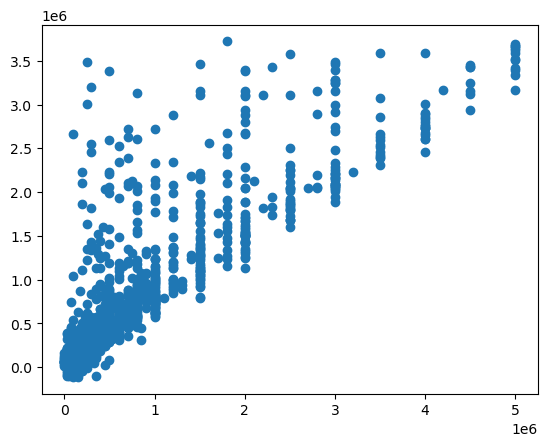

In [97]:
plt.scatter(Real_Values,predictions);

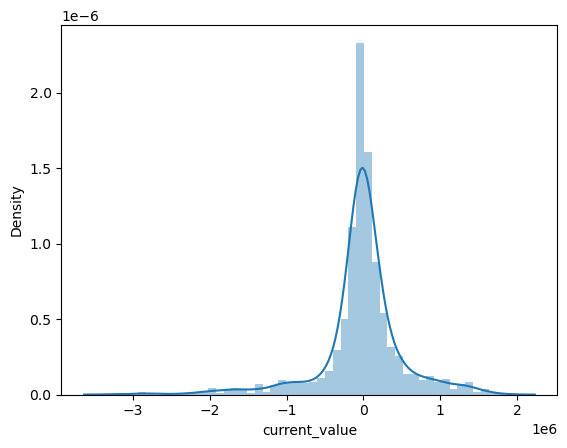

In [99]:
sns.distplot((y_test-predictions),bins=50);

In [101]:
#R Square for best_lasso model
r2_score_train = r2_score(y_train, best_lasso.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7268814200630995
R Square for testing: 0.719241354557794


In [103]:
#R Square for lasso_model
r2_score_train = r2_score(y_train, lasso_model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7268814285909866
R Square for testing: 0.719241354557794


In [105]:
#R Square for best_ridge model
r2_score_train = r2_score(y_train, best_ridge.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.726878287439457
R Square for testing: 0.719241354557794


In [107]:
#R Square for ridge_model
r2_score_train = r2_score(y_train, ridge_model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7268812992048891
R Square for testing: 0.719241354557794
